# Load OpenMonkeyStudio Data

In [1]:
%load_ext autoreload
%autoreload 2
from load import *
import torch
import yaml
import logging
from imp import reload
import matplotlib.pyplot as plt
from liftpose.vision_3d import world_to_camera
reload(logging)
logger = logging.getLogger(__name__).setLevel(logging.INFO)

# decleare data parameters
par_train = {'data_dir'     : '/data/LiftFly3D/openmonkey/OMS_Dataset/', # change the path 
           'out_dir'        : './out_np_then_bln/',
           'train_subjects' : ["7", "9a", "9b", "10", "11"],
           'test_subjects'  : ["9"]}

# merge with training parameters
par_data = yaml.full_load(open('param.yaml', "rb"))
par = {**par_data["data"], **par_train}

# load data
cameras, cam_list, pose_result = load_data(par['data_dir'], par["subjects"])

NameError: name 'load_data' is not defined

In [3]:
# https://stackoverflow.com/a/38865534/7554774
# conda install ipympl
%matplotlib widget
#%matplotlib inline
from liftpose.plot import plot_pose_3d

fig = plt.figure(figsize=plt.figaspect(1), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=200, azim=60)

t = 330
plot_pose_3d(ax=ax, tar=pose_result['7']["points3d"][t], 
            bones=par_data["vis"]["bones"], 
            limb_id=par_data["vis"]["limb_id"], 
            colors=par_data["vis"]["colors"]) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'pose_result' is not defined

In [1]:
from scipy.io import loadmat
data = loadmat(f"/data/LiftFly3D/openmonkey/OMS_Dataset/Data.mat")
name = data["T"][0][0]["name"]

In [5]:
len(name)
# what if I use the same calibration?

194518

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

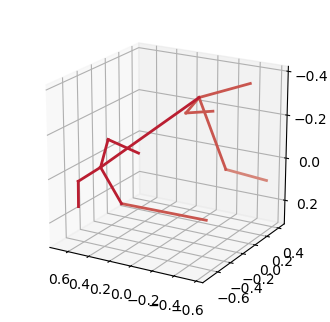

In [202]:
# https://stackoverflow.com/a/38865534/7554774
# conda install ipympl
%matplotlib widget
#%matplotlib inline
from liftpose.plot import plot_pose_3d

fig = plt.figure(figsize=plt.figaspect(1), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=200, azim=60)

t = 8960
plot_pose_3d(ax=ax, tar=test_3d['9'][t], 
            bones=par_data["vis"]["bones"], 
            limb_id=par_data["vis"]["limb_id"], 
            colors=par_data["vis"]["colors"]) 

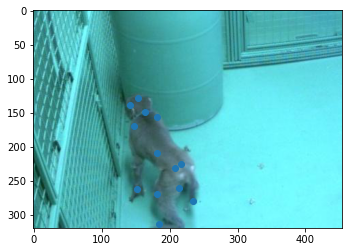

In [200]:
%matplotlib inline
plt.figure()
cam_id = 34
img_id = 8960
btch_id = '9'
plt.imshow(plt.imread('/data/LiftFly3D/openmonkey/OMS_Dataset/Images/batch{}_{:09d}_{}.jpg'.format(btch_id, img_id, cam_list[cam_id])))

pts2d = test_2d[btch_id][cam_id][img_id]
plt.scatter(pts2d[:,0], pts2d[:,1])

In [205]:
R, tvec, K, P = cameras['7'][cam_id]["R"], cameras['7'][cam_id]["tvec"], cameras['7'][cam_id]["K"], cameras['7'][cam_id]["P"]
pt2d = K @ ((R @ test_3d[btch_id][img_id].T + tvec))

ValueError: operands could not be broadcast together with shapes (3,13) (3,) 

In [248]:
pose_result[btch_id]['crop']

17101

ValueError: operands could not be broadcast together with shapes (13,2) (1,27101,2) (13,2) 

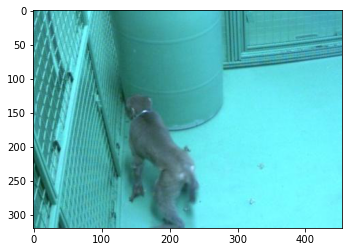

In [242]:
%matplotlib inline
plt.figure()
cam_id = 34
img_id = 8960
btch_id = '9'
plt.imshow(plt.imread('/data/LiftFly3D/openmonkey/OMS_Dataset/Images/batch{}_{:09d}_{}.jpg'.format(btch_id, img_id, cam_list[cam_id])))

pts2d = test_2d[btch_id][cam_id][img_id]
#plt.scatter(pt2d[:,0], pt2d[:,1])

pt2d = (K @ ((R @ test_3d[btch_id][img_id].T) + tvec[:,None])).T
pt2d /= pt2d[..., [-1]]
pt2d = pt2d[:, :-1]
pts2d -= pose_result[btch_id]['crop'][img_id][None, :]
plt.scatter(pt2d[:,0], pt2d[:,1])

In [239]:
pose_result[btch_id].keys()

dict_keys(['points2d', 'points3d', 'cam_id', 'img_id', 'batch_id'])

In [ ]:
# TODO make surep rojections are correct
# TODO make a video with 3d pose + frames

In [110]:
pose_result['7'].keys()

dict_keys(['points2d', 'points3d', 'cam_id', 'img_id', 'batch_id'])

In [72]:
from liftpose.vision_3d import reprojection_error
cam_id = 0
R, tvec, K, P = cameras['7'][cam_id]["R"], cameras['7'][cam_id]["tvec"], cameras['7'][cam_id]["K"], cameras['7'][cam_id]["P"]
reprojection_error(train_3d['7'], train_2d['7'],  R, tvec, K)

array([[ 887.15115892,  878.20608954,  875.27369657, ...,  868.37187824,
         869.21827518,  864.2186266 ],
       [ 838.26123523,  831.64689073,  830.03805518, ...,  821.15620636,
         822.34843425,  817.03359084],
       [ 858.07977899,  859.03885406,  855.87215623, ...,  845.82829018,
         848.78822542,  840.85474303],
       ...,
       [2135.45430852, 2166.7872793 , 2095.2094088 , ..., 2458.48165905,
        2715.08082383, 2133.07281605],
       [1675.91985916, 1750.69353539, 2088.62205731, ..., 2097.09464446,
        2025.75013435, 2442.23611505],
       [1948.439368  , 1941.07931236, 2001.03130692, ..., 2396.83481574,
        2508.48332371, 2353.08202492]])

In [123]:
for cam_id in range(60):
    pt3d = pose_result['7']["points3d"][0][0]
    pt2d = pose_result['7']["points2d"][0][0]
    R, tvec, K, P = cameras['7'][cam_id]["R"], cameras['7'][cam_id]["tvec"], cameras['7'][cam_id]["K"], cameras['7'][cam_id]["P"]

    u = P @ np.append(pt3d, [1])
    u = u[0:2] / u[2]
    proj = u

    print(cam_id, proj - pt2d)

0 [825.08593113 325.99138796]
1 [803.82673148 298.09123394]
2 [-309.91822318  255.71582228]
3 [680.65044786 371.77889166]
4 [785.33848244 204.77463577]
5 [-225.93917835  920.21536401]
6 [2040.28893329  670.79963199]
7 [-536.36980421  258.80734632]
8 [-1483.55737786   154.78006106]
9 [1038.8054125   259.21698964]
10 [705.52619169 206.68398825]
11 [-35.37380402 192.82982975]
12 [ -62.98491646 2153.12274361]
13 [-1375.04039539   239.30143944]
14 [250.08015919 195.18437243]
15 [183.93468242 325.62721733]
16 [410.92456593 298.19281566]
17 [-408.99462197  807.52417884]
18 [329.28886228 203.54653392]
19 [1212.8434868   148.31969128]
20 [327.78926422 437.75856127]
21 [2252.96096793  172.22488553]
22 [2700.15202273 1614.45144942]
23 [5183.1378713  1444.72096218]
24 [264.00015408 271.53073746]
25 [-612.26340149  352.56005847]
26 [121.41062215 375.04537056]
27 [966.07020036 230.09851235]
28 [2123.9273497  2671.52755627]
29 [3077.15037679 -207.30598238]
30 [5776.63180909  -22.70979589]
31 [4513.28

In [97]:
pt3d.s

(13, 3)

In [52]:
P.shape

(13,)

In [47]:
pt3d = train_3d['7'][0][0]
pt2d = K @ (R @ pt3d + tvec)
pt2d /= pt2d[-1]
print(pt2d.shape)
pt2d = pt2d[:-1]
print(pt2d.shape)


print(pt2d)
print(train_2d['7'][0][0])

(3,)
(2,)
[1047.08593113  488.99138796]
[222. 163.]


In [5]:
print("convert to camera coordinate system")
# convert 3d points into camera coordinate system
for btch in train_3d.keys():
    cam_id = pose_result[btch]['cam_id'][idx]
    R, T, intr, distort, vis_pts = cameras[btch][cam_id]
    train_3d[btch] = world_to_camera(train_3d[btch], R, T)
        
for btch in test_3d.keys():
    cam_id = pose_result[btch]['cam_id'][idx]
    R, T, intr, distort, vis_pts = cameras[btch][cam_id]
    test_3d[btch] = world_to_camera(test_3d[btch].copy(), R, T)

print("bone length normalize")
# 3d points bone-length normalize
for btch in train_3d.keys():
    train_3d[btch] = bone_length_normalize(template=train_3d['7'], d=train_3d[btch], leaves=par_data['vis']['leaves'], parents=par_data['vis']['parents'])
    
for btch in test_3d.keys():
    test_3d[btch] = bone_length_normalize(template=train_3d['7'], d=test_3d[btch], leaves=par_data['vis']['leaves'], parents=par_data['vis']['parents'])
        
# then project


        
# unit norm of 2d points
train_2d = {k: v / np.linalg.norm(v.reshape(v.shape[0],-1), axis=1)[:,np.newaxis,np.newaxis] for (k,v) in train_2d.items()}
test_2d = {k: v / np.linalg.norm(v.reshape(v.shape[0],-1), axis=1)[:,np.newaxis,np.newaxis] for (k,v) in test_2d.items()}

convert to camera coordinate system


NameError: name 'idx' is not defined

# Train LiftPose3D Network on DeepFly3D Data

In [62]:
from liftpose.main import train as lp3d_train

lp3d_train(train_2d=train_2d, test_2d=test_2d, train_3d=train_3d, test_3d=test_3d, 
           roots=par['roots'], target_sets=par['target_sets'], out_dir=par['out_dir'])

[main.py:189]:INFO:Saving pre-processed 2D data at /home/user/Desktop/LiftPose3D/examples/openmonkey/out/stat_2d.pth.tar.
[main.py:218]:INFO:Saving pre-processed 3D data at /home/user/Desktop/LiftPose3D/examples/openmonkey/outstat_3d.pth.tar.
[main.py:239]:INFO:Starting training model.
[main.py:246]:DEBUG:
==================Options=================
[main.py:247]:DEBUG:{   'batch_size': 64,
    'data_dir': '/home/user/Desktop/LiftPose3D/examples/openmonkey/out',
    'dropout': 0.5,
    'epochs': 10,
    'exp': '',
    'is_train': True,
    'job': 8,
    'linear_size': 1024,
    'load': None,
    'lr': 0.001,
    'lr_decay': 5000,
    'lr_gamma': 0.9,
    'max_norm': True,
    'noise': None,
    'num_stage': 2,
    'out': '/home/user/Desktop/LiftPose3D/examples/openmonkey/out',
    'out_dir': '/home/user/Desktop/LiftPose3D/examples/openmonkey/out',
    'predict': False,
    'procrustes': False,
    'resume': False,
    'test': False}
[main.py:248]:DEBUG:==================================

Epoch 000 | LR  0.00100 | Loss Test  0.00000 | Loss Train  1.69479|: 100%|██████████| 550/550 [00:13<00:00, 41.71it/s]
Epoch 001 | LR  0.00100 | Loss Test  1.02409 | Loss Train  0.89782|: 100%|██████████| 550/550 [00:13<00:00, 42.03it/s]
Epoch 002 | LR  0.00100 | Loss Test  0.91257 | Loss Train  0.86235|: 100%|██████████| 550/550 [00:12<00:00, 43.11it/s]
Epoch 003 | LR  0.00100 | Loss Test  0.91480 | Loss Train  0.83683|: 100%|██████████| 550/550 [00:12<00:00, 43.88it/s]
Epoch 004 | LR  0.00100 | Loss Test  1.00479 | Loss Train  0.82363|:  73%|███████▎  | 400/550 [00:09<00:03, 40.18it/s]


KeyboardInterrupt: 

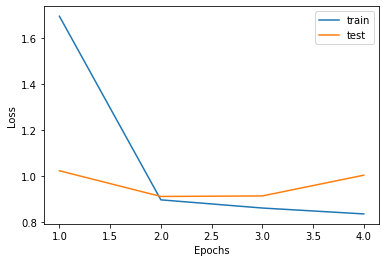

In [63]:
%matplotlib inline
from liftpose.plot import read_log_train, plot_log_train
epoch, lr, loss_train, loss_test, err_test = read_log_train(par['out_dir'])
plot_log_train(plt.gca(), loss_train, loss_test, epoch)

# Run Trained LiftPose3D Network on the Test Data

In [64]:
from liftpose.main import test as lp3d_test
lp3d_test(par['out_dir'])

[main.py:270]:INFO:starting testing in path: ./out
[lift.py:29]:INFO:Training on the device: cuda:0
[lift.py:57]:INFO:total params: 4.27M
[lift.py:63]:INFO:loading ckpt from './out/ckpt_best.pth.tar'
[lift.py:71]:INFO:ckpt loaded (epoch: 3 | err: 0.8196190735725262)
[lift.py:109]:INFO:Saving results: /home/user/Desktop/LiftPose3D/examples/openmonkey/out/test_results.pth.tar


# Run Trained LiftPose3D Network on the Test Data

In [66]:
from liftpose.postprocess import load_test_results
data = torch.load(os.path.join(par['out_dir'], "test_results.pth.tar"))
stat_2d, stat_3d = (
    torch.load(os.path.join(par['out_dir'], "stat_2d.pth.tar")),
    torch.load(os.path.join(par['out_dir'], "stat_3d.pth.tar")),
)
test_3d_gt, test_3d_pred, _ = load_test_results(data, stat_2d, stat_3d)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

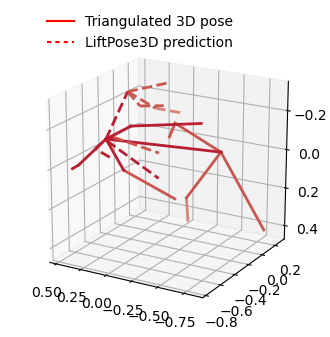

In [67]:
# https://stackoverflow.com/a/38865534/7554774
# conda install ipympl
%matplotlib widget
#%matplotlib inline
from liftpose.plot import plot_pose_3d

fig = plt.figure(figsize=plt.figaspect(1), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=200, azim=60)

t = 330
plot_pose_3d(ax=ax, tar=test_3d_gt[t], 
            pred=test_3d_pred[t], 
            bones=par_data["vis"]["bones"], 
            limb_id=par_data["vis"]["limb_id"], 
            colors=par_data["vis"]["colors"]) 